<a href="https://colab.research.google.com/github/HanlunAI/NextGenCurriculumDemonstration/blob/main/CollaborationDerivatives.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is a bookkeeping of some interesting problems arising from sitting in SPC summer workshop.

**(A)** Fibonacci sequence and the golden ratio

In [1]:
fibonacciRecord = [0,1]
def nextFibonacci():
  fibonacciRecord.append(fibonacciRecord[-1]+fibonacciRecord[-2])
  return

ratioRecord = []
for i in range(1,50):
  nextFibonacci()
  ratioRecord.append(fibonacciRecord[i+1]/fibonacciRecord[i])
  print(fibonacciRecord[i], fibonacciRecord[i+1]/fibonacciRecord[i])

1 1.0
1 2.0
2 1.5
3 1.6666666666666667
5 1.6
8 1.625
13 1.6153846153846154
21 1.619047619047619
34 1.6176470588235294
55 1.6181818181818182
89 1.6179775280898876
144 1.6180555555555556
233 1.6180257510729614
377 1.6180371352785146
610 1.618032786885246
987 1.618034447821682
1597 1.6180338134001253
2584 1.618034055727554
4181 1.6180339631667064
6765 1.6180339985218033
10946 1.618033985017358
17711 1.6180339901755971
28657 1.618033988205325
46368 1.618033988957902
75025 1.6180339886704431
121393 1.6180339887802426
196418 1.618033988738303
317811 1.6180339887543225
514229 1.6180339887482036
832040 1.6180339887505408
1346269 1.6180339887496482
2178309 1.618033988749989
3524578 1.618033988749859
5702887 1.6180339887499087
9227465 1.6180339887498896
14930352 1.618033988749897
24157817 1.618033988749894
39088169 1.6180339887498951
63245986 1.6180339887498947
102334155 1.618033988749895
165580141 1.618033988749895
267914296 1.618033988749895
433494437 1.618033988749895
701408733 1.618033988749

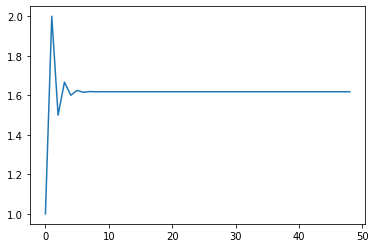

In [2]:
import matplotlib.pyplot as plt
plt.plot(ratioRecord)

**(B)** The silver ratio is one of the fixed points of 

$$F(x) = 2+\frac{1}{x}$$

Let's play with some iterations.

In [3]:
import numpy as np

def F(x):
  return 2+1/x

n = 20
iteration = 6
iterateRecord = np.empty([iteration+1, n])
iterateRecord[0] = np.linspace(-11, 11, num=n)

for i in range(iteration):
  iterateRecord[i+1] = F(iterateRecord[i])

iterateRecord = np.transpose(iterateRecord)
print(iterateRecord)

[[-11.           1.90909091   2.52380952   2.39622642   2.41732283
    2.41368078   2.41430499]
 [ -9.84210526   1.89839572   2.52676056   2.39576366   2.41740344
    2.41366699   2.41430736]
 [ -8.68421053   1.88484848   2.53054662   2.39517154   2.41750663
    2.41364933   2.41431039]
 [ -7.52631579   1.86713287   2.53558052   2.394387     2.41764343
    2.41362592   2.41431441]
 [ -6.36842105   1.84297521   2.5426009    2.39329806   2.41783346
    2.41359342   2.41431999]
 [ -5.21052632   1.80808081   2.55307263   2.3916849    2.41811528
    2.41354521   2.41432826]
 [ -4.05263158   1.75324675   2.57037037   2.38904899   2.4185766
    2.41346633   2.41434181]
 [ -2.89473684   1.65454545   2.6043956    2.38396624   2.41946903
    2.41331383   2.41436799]
 [ -1.73684211   1.42424242   2.70212766   2.37007874   2.42192691
    2.41289438   2.41444002]
 [ -0.57894737   0.27272727   5.66666667   2.17647059   2.45945946
    2.40659341   2.41552511]
 [  0.57894737   3.72727273   2.26829268 

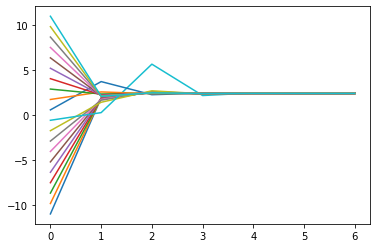

In [4]:
import matplotlib.pyplot as plt
for i in range(n):
  plt.plot(iterateRecord[i])

While the above plot shows how different starting points converge to the silver ratio as an attracting fixed point, something interesting is happening near another repelling fixed point. There will be an example of how rounding error would accumulate over iterations.

[[ -0.71421356   0.59985857   3.66705963   2.27269805   2.44000566
    2.40983512   2.41496615   2.41408448   2.41423571   2.41420976
    2.41421421   2.41421345   2.41421358   2.41421356   2.41421356
    2.41421356   2.41421356   2.41421356   2.41421356   2.41421356
    2.41421356   2.41421356   2.41421356   2.41421356   2.41421356
    2.41421356]
 [ -0.67671356   0.5222699    3.91471881   2.25544619   2.44337125
    2.40927059   2.41506338   2.41406781   2.41423857   2.41420927
    2.4142143    2.41421344   2.41421358   2.41421356   2.41421356
    2.41421356   2.41421356   2.41421356   2.41421356   2.41421356
    2.41421356   2.41421356   2.41421356   2.41421356   2.41421356
    2.41421356]
 [ -0.63921356   0.43557762   4.29580204   2.2327854    2.44787108
    2.40851825   2.41519303   2.41404558   2.41424239   2.41420862
    2.41421441   2.41421342   2.41421359   2.41421356   2.41421356
    2.41421356   2.41421356   2.41421356   2.41421356   2.41421356
    2.41421356   2.41421356   

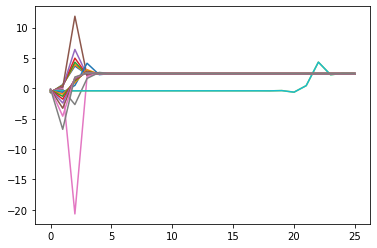

In [5]:

#something interesting is happening near another (repelling) fixed point
n = 9
#it will be an example of how rounding error would accumulate by iterating many times, say 25
iteration = 25
iterateRecord = np.empty([iteration+1, n*2])
belowAnotherFixedPoint = np.linspace(1-np.sqrt(2)-0.3, 1-np.sqrt(2), num=n)
aboveAnotherFixedPoint = np.linspace(1-np.sqrt(2), 1-np.sqrt(2)+0.3, num=n)
iterateRecord[0] = np.append(belowAnotherFixedPoint, aboveAnotherFixedPoint)

for i in range(iteration):
  iterateRecord[i+1] = F(iterateRecord[i])

iterateRecord = np.transpose(iterateRecord)
print(iterateRecord)

for i in range(n*2):
  plt.plot(iterateRecord[i])

**(C)** Logistic map

Logistic map describes an interesting phenomenon arising from a simple population model. We start from a simple recurrence relation depending on a model parameter $u$ valued between $0$ and $4$. Then we may take any initial value between $0$ and $1$, iterate with the recurrence relation to get $x_i$'s, a series of modelled ratio of existing population to the maximum possible population:

$$x_{n+1} = u x_{n} (1-x_{n})$$



Let's iterate P(x)=3.055x(1-x) for some x ∈ (0,1)


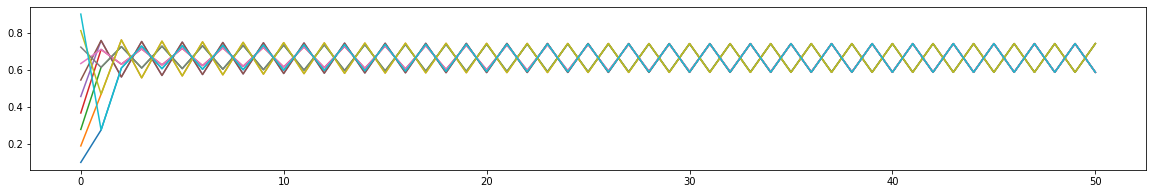

In [8]:
import numpy as np
import matplotlib.pyplot as plt

#@title Logistic map
#@markdown recurrence relation: x_{n+1} = u*x_n*(1-x_n) 

#@markdown As u increase from 0 to 4, behaviour of x's varies from convergence, to periodic oscillations, and to chaotic pseudo-random trends... 

u = 3.055 #@param{type:"slider", min:0, max:4, step:0.001}

"""
while True:
  u = float(input('input value larger than 0 and smaller than 4 (re-run the cell to try again) '))
  if 0<u<4:
    break
"""

print("Let's iterate P(x)={}x(1-x) for some x \u2208 (0,1)".format(u))

def P_u(x):
  global u
  return u*x*(1-x)

n = 10
iteration = 50
iterateRecord = np.empty([iteration+1, n])
iterateRecord[0] = np.linspace(0.1, 0.9, num=n)

for i in range(iteration):
  iterateRecord[i+1] = P_u(iterateRecord[i])

iteratePlot = np.transpose(iterateRecord)
#print(iteratePlot)

plt.rcParams["figure.figsize"] = (20,3)
for i in range(n):
  plt.plot(iteratePlot[i])
